In [1]:
#I will start by importing the relevant modules will be used throughout the project

import pandas as pd #import pandas
import numpy as np #import numpy
import matplotlib.pyplot as plt #import matplotlib module
import seaborn as sns # import the seaborn module


<function matplotlib.pyplot.show(close=None, block=None)>

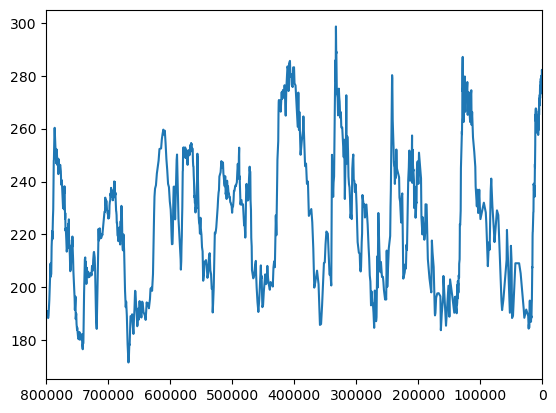

In [2]:
#first we import the CO2 data from the 41586_2008_BFnature06949_MOESM31_ESM.xls

CO2dataset = pd.read_excel("41586_2008_BFnature06949_MOESM31_ESM.xls", sheet_name="3.  Composite CO2", header=6) #here we are importing the data from the excel file, specifying the sheet name and the row that should br treated as the header.


# Now we generate a graph of the data set
x = CO2dataset['EDC3_gas_a (yr)']
y = CO2dataset['CO2 (ppmv)']
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(800000,0)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

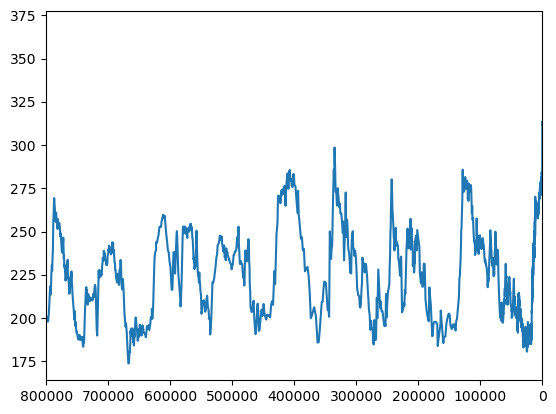

In [3]:
#Next we import the CO2 data from the 'grl52461-sup-0003-supplementary.xls' file from the IPCC report

AltCO2 = pd.read_excel("grl52461-sup-0003-supplementary.xls", sheet_name="CO2 Composite", header=14) #here we are importing the data from the excel file, specifying the sheet name and the row that should br treated as the header.
AltCO2.rename(columns = {'CO2 (ppmv)': 'CO2 (ppmv) IPCC'},inplace=True) #renaming the CO2 column for use later in the notebook

# Now we generate a graph of the data set
x = AltCO2['Gasage (yr BP) ']
y = AltCO2['CO2 (ppmv) IPCC']
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(800000,0)
plt.show

In [4]:
#Create a new empty dataframe to import CO2 data from both sources

CO2df = pd.concat([CO2dataset['EDC3_gas_a (yr)'], CO2dataset['CO2 (ppmv)'], AltCO2['CO2 (ppmv) IPCC']],axis=1, join='inner')
CO2df.rename(columns = {'EDC3_gas_a (yr)': 'year'},inplace=True) #renaming the CO2 column for use later in the notebook
#CO2df = pd.concat(CO2)
display(CO2df)


,year,CO2 (ppmv),CO2 (ppmv) IPCC
0,137,280.4,368.022488
1,268,274.9,361.780737
2,279,277.9,359.647793
3,395,279.1,357.106740
4,404,281.9,353.946685
...,...,...,...
1091,794608,199.4,189.400000
1092,795202,195.2,190.100000
1093,796467,189.3,207.700000
1094,797099,188.4,213.200000


<function matplotlib.pyplot.show(close=None, block=None)>

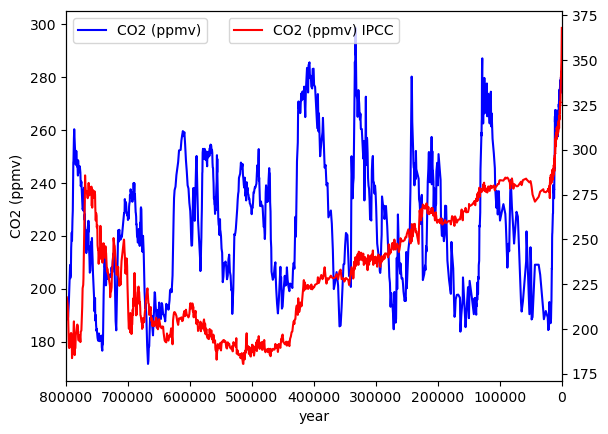

In [5]:
#Now we plot both CO2 sources on a single graph to compare trends over time
# Now we generate a graph of the data set
x = CO2df['year']
y = CO2df['CO2 (ppmv)']
z = CO2df['CO2 (ppmv) IPCC']
fig, ax1 = plt.subplots()
ax1.plot(x,y, label = 'CO2 (ppmv)', color='blue')
plt.legend(loc = 'upper left')
plt.xlabel("year")
plt.ylabel("CO2 (ppmv)")
ax1.set_xlim(800000,0)
ax2= ax1.twinx()
ax2.plot(x,z, label='CO2 (ppmv) IPCC', color = 'Red')
plt.legend(loc = 'upper center')
ax2.set_xlim(800000,0)

plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

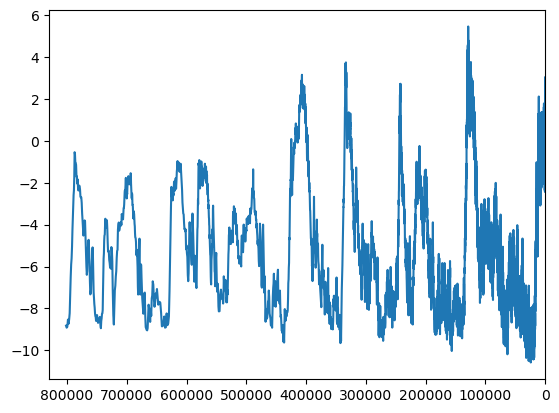

In [6]:
#Next we import the temparature data from the 'epicaDC.deuttemp.EDC3-AICC.xls' file

tempdata = pd.read_excel("edc3deuttemp2007.xls", sheet_name="Data", header=11) 
tempdata

# Now we generate a graph of the data set
x = tempdata['age EDC3 (yr b1950)']
y = tempdata['Temperature2007']
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(830000,0)
plt.show

In [7]:
#Import ch4 data from https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt 
#I tried to download a file containing the data but was unable to. I compied and pasted the data from the web to the txt file and saved it in the project folder

ch4raw = pd.read_fwf('EPICA Dome C Ice Core 800KYr Methan.txt') #read in the data from the txt file


<function matplotlib.pyplot.show(close=None, block=None)>

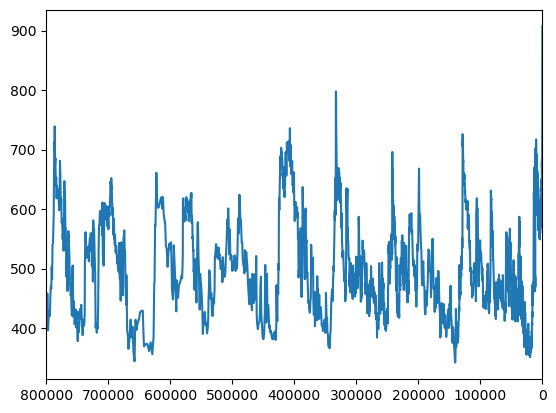

In [8]:
# Now we generate a graph of the data set
x = ch4raw['Gas Age']
y = ch4raw['CH4 mean']
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(800000,0)
plt.show

In [20]:
#Now, we want to create a new data frame that contains the CO2, Temperature and ch4 data sets in a single data fram for surther analysis.

dfFinal = pd.concat([CO2dataset['EDC3_gas_a (yr)'], CO2dataset['CO2 (ppmv)'], tempdata['Temperature2007'], ch4raw['CH4 mean']],axis=1, join='inner') # This creates a single data frame with each of the datasets included in a single data frame
dfFinal.rename(columns = {'EDC3_gas_a (yr)': 'year', 'CO2 (ppmv)':'CO2', 'Temperature2007': 'temp', 'CH4 mean': 'CH4'}, inplace=True) #renaming the CO2 column for use later in the notebook

display(dfFinal)

,year,CO2,temp,CH4
0,137,280.4,NaN,907
1,268,274.9,NaN,784
2,279,277.9,NaN,762
3,395,279.1,NaN,710
4,404,281.9,NaN,727
...,...,...,...,...
1091,794608,199.4,-9.458641,545
1092,795202,195.2,-9.144625,548
1093,796467,189.3,-8.912734,539
1094,797099,188.4,-9.272964,565


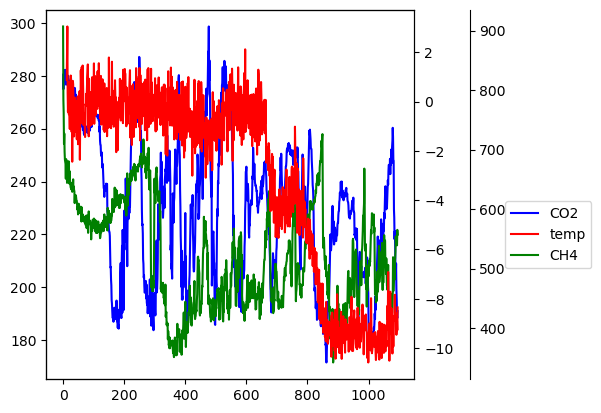

In [23]:
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

dfFinal.CO2.plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
dfFinal.temp.plot(ax=ax, style='r-', secondary_y=True)
dfFinal.CH4.plot(ax=ax3, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['CO2','temp','CH4'], bbox_to_anchor=(1.5, 0.5))

#dfFinal.plot(x='year', y=['CO2 (ppmv)', 'Temperature2007', 'CH4 mean'])


The variables graphed individually previously in the notbook follow a very similar trend. When merging the three variables into a single graph, the visualisation becomes distorted. I believe this is due to the fact that the temperature dataset has over 5000 records while the CO2 and CH4 datasets have significantly less. I have tried to filter the temperature data based on the year (only include values that match the year from the CO2 data set) but I am finding it difficult to match them without rounding the temp data and marrying them up individually in excel.

In [77]:
#Now we want to create a synthetic dataset using the temperature anomaly data set

sampletemp = tempdata['Temperature2007'].head(50) #take the last x number of rows fromt he temperature anomaly data above to capture recent trend
synthetictemp = pd.DataFrame({'temp':np.random.choice(sampletemp, size = 100)})
mergedtemp = pd.concat([synthetictemp['temp'], tempdata['Temperature2007'].head(50)])
mergedtemp.to_csv('mergedtest', sep = ',')

In [11]:
#Next we export the dataframe to csv

dfFinal.to_csv('climate dataset_csv', sep=',', index_label='index')

In [12]:
#Next is to export data to json format
dfFinal.to_json('climate dataset_json')

**References**

- https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
- https://pythonbasics.org/matplotlib-line-chart/
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
- https://www.youtube.com/watch?v=6L6whtUm82Y
- https://stackoverflow.com/questions/11640243/plot-multiple-y-axes
- https://stackoverflow.com/questions/75431355/generating-synthetic-data-using-scikit-learn-for-ml
- https://saturncloud.io/blog/how-to-plot-multiple-lines-with-pandas-dataframe/#:~:text=head())-,Plotting%20Multiple%20Lines,%2C%20scatter%2C%20etc.).
- https://stackoverflow.com/questions/76555652/how-to-create-synthetic-data-based-on-real-data
- https://pandas.pydata.org/docs/reference/api/pandas.Index.html
- 
- 

